The objective of this project is learn about create a machine learning code to identify images from a pet's gallery
mixed with cats and dog photos

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plp
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
trainD = "D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/train"
testD = "D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/test"
validation = "D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/validation"

Preprocessing

As first part of this project, we need to:
1- Read the pictures files
2- Decode the type files
3- Convert into tensors
4- Rescale

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

In [5]:
#This section is focused on training data model, choosing a sample from previous called datasets.
#In this case a sample of 20 photos. Also this code represents a transformation data through tensorflow library 

traindatagen = IDG(rescale=1./255)
testdatagen = IDG(rescale=1./255)

traingen = traindatagen.flow_from_directory(trainD, target_size=(150,150), batch_size = 20, class_mode = "binary")
validationgen = testdatagen.flow_from_directory(testD, target_size=(150,150), batch_size = 20, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
#As the intention of this project is realize the process through a neural network, we'll continue
#generating a network model with the next characteristics 

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics=["acc"])

In [9]:
history = model.fit_generator(traingen, steps_per_epoch=100, epochs = 20, validation_data = validationgen, validation_steps = 50)

<ipython-input-9-d198d9054cf6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(traingen, steps_per_epoch=100, epochs = 20, validation_data = validationgen, validation_steps = 50)


Epoch 1/20
100/100 [==============================] - 130s 1s/step - loss: 0.6965 - acc: 0.5230 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 98s 979ms/step - loss: 0.6589 - acc: 0.6055 - val_loss: 0.6505 - val_acc: 0.6120
Epoch 3/20
100/100 [==============================] - 98s 981ms/step - loss: 0.6037 - acc: 0.6730 - val_loss: 0.6104 - val_acc: 0.6860
Epoch 4/20
100/100 [==============================] - 97s 965ms/step - loss: 0.5631 - acc: 0.7100 - val_loss: 0.5970 - val_acc: 0.6930
Epoch 5/20
100/100 [==============================] - 84s 836ms/step - loss: 0.5380 - acc: 0.7200 - val_loss: 0.5894 - val_acc: 0.6870
Epoch 6/20
100/100 [==============================] - 85s 849ms/step - loss: 0.5082 - acc: 0.7570 - val_loss: 0.5766 - val_acc: 0.7080
Epoch 7/20
100/100 [==============================] - 95s 948ms/step - loss: 0.4825 - acc: 0.7705 - val_loss: 0.5773 - val_acc: 0.6990
Epoch 8/20
100/100 [==============================] - 98s

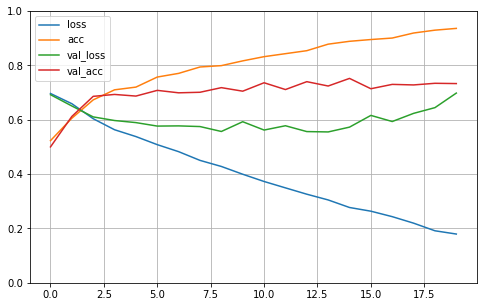

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plp.grid(True)
plp.gca().set_ylim(0, 1)
plp.show()

In [11]:
model.save("model.h5")

In [12]:
from tensorflow.keras import backend as K
K.clear_session()
del model

In [14]:
#We create anothe data transformation to see how the results may be better
train_datagen = IDG(rescale= 1./255,
                   rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,)

test_datagen = IDG(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    trainD,
                    target_size=(150,150),
                    batch_size =32,
                    class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
                    validation,
                    target_size=(150,150),
                    batch_size =32,
                    class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3,3), activation = "relu"))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3,3), activation = "relu"))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3,3), activation = "relu"))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())

model2.add(layers.Dense(512, activation = "relu"))
model2.add(layers.Dense(1, activation = "sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [47]:
history2 = model2.fit(
            train_generator,
            steps_per_epoch = 60,
            epochs=50,
            validation_data=validation_generator,
            validation_steps = 25)

Epoch 1/50
60/60 [==============================] - 62s 1s/step - loss: 0.6874 - acc: 0.5515 - val_loss: 0.6672 - val_acc: 0.6125
Epoch 2/50
60/60 [==============================] - 63s 1s/step - loss: 0.6734 - acc: 0.5856 - val_loss: 0.6887 - val_acc: 0.5437
Epoch 3/50
60/60 [==============================] - 63s 1s/step - loss: 0.6583 - acc: 0.6140 - val_loss: 0.7133 - val_acc: 0.5200
Epoch 4/50
60/60 [==============================] - 64s 1s/step - loss: 0.6532 - acc: 0.6129 - val_loss: 0.6312 - val_acc: 0.6212
Epoch 5/50
60/60 [==============================] - 64s 1s/step - loss: 0.6260 - acc: 0.6513 - val_loss: 0.6090 - val_acc: 0.6687
Epoch 6/50
60/60 [==============================] - 63s 1s/step - loss: 0.6218 - acc: 0.6418 - val_loss: 0.6513 - val_acc: 0.6162
Epoch 7/50
60/60 [==============================] - 64s 1s/step - loss: 0.6079 - acc: 0.6686 - val_loss: 0.6636 - val_acc: 0.5950
Epoch 8/50
60/60 [==============================] - 64s 1s/step - loss: 0.5984 - acc: 0.67

In [48]:
model2.save("project_cnn.h5")

<function matplotlib.pyplot.show(*args, **kw)>

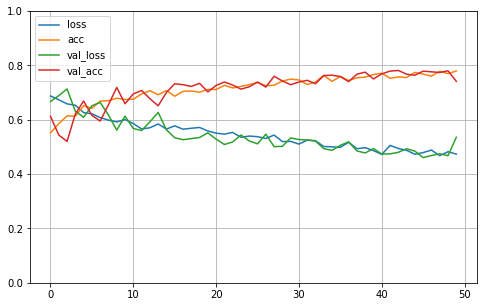

In [49]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plp.grid(True)
plp.gca().set_ylim(0, 1)
plp.show

In this last case, we can see better results in Validation Accuracy, this through the images transformation based to maintain a better algorithm capable of identify in better way each image.